# Seam Phase 1 data visualization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import segyio
import numpy as np
import random
import matplotlib.pyplot as plt
import pylops
import warnings
warnings.filterwarnings('ignore')

from scipy.interpolate import RegularGridInterpolator

## Velocity model

In [2]:
# Dimensions
nz, ny, nx = 1501, 2001, 1751
dz, dy, dx = 10, 20, 20

# Velocity
vp = np.fromfile('/mnt/datawaha_dig/Data/Seam_Phase1/Vp', dtype='<f')
vp = vp.reshape(nz, ny, nx)

vp2d = vp[:-20, 1000]
nz -= 20 # remove bottom layer

In [3]:
# Resample on 12.5 x 12.5 grid
x = np.arange(nx) * dx
z = np.arange(nz) * dz
xint = np.arange(x[0], x[-1], 12.5)
zint = np.arange(z[0], z[-1], 12.5)
nxint, nzint = len(xint), len(zint)
X, Z = np.meshgrid(xint, zint, indexing='ij')
XZ = np.vstack((X.ravel(), Z.ravel())).T

vp2dinterp = np.zeros(nxint*nzint, dtype=np.float32)
interpolator = RegularGridInterpolator((x,z), vp2d.T, bounds_error=False, fill_value=0)
vp2dinterp = interpolator(XZ).reshape(nxint, nzint).T

## Streamer data

In [4]:
f = np.load('shots_fs_open/Streamer.npz')
dstreamer = f['d']
taxistot = f['t']
src, rec = f['src'], f['rec']
nsrc, nrec_streamer, nt = dstreamer.shape

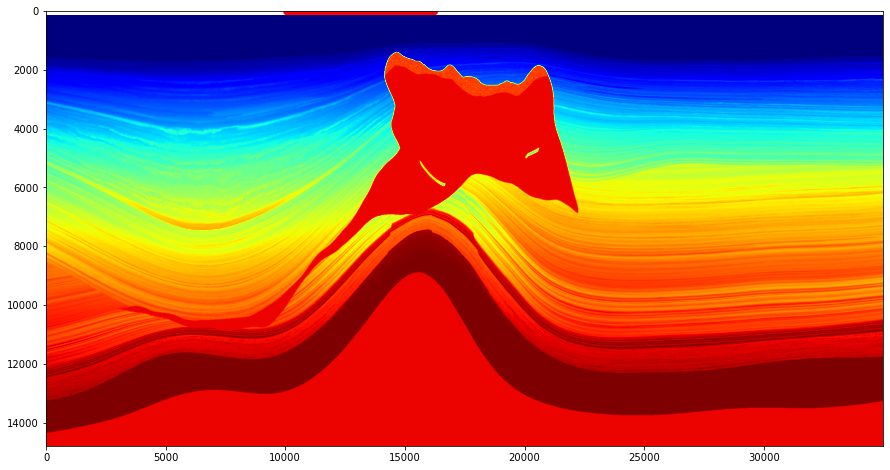

In [5]:
plt.figure(figsize=(15, 8))
plt.imshow(vp2dinterp, cmap='jet', extent=(xint[0], xint[-1], zint[-1], zint[0]))
plt.scatter(rec[:, 0], rec[:, 1], c='w', s=10)
plt.scatter(src[:, 0], src[:, 1], c='r', s=10)
plt.axis('tight');

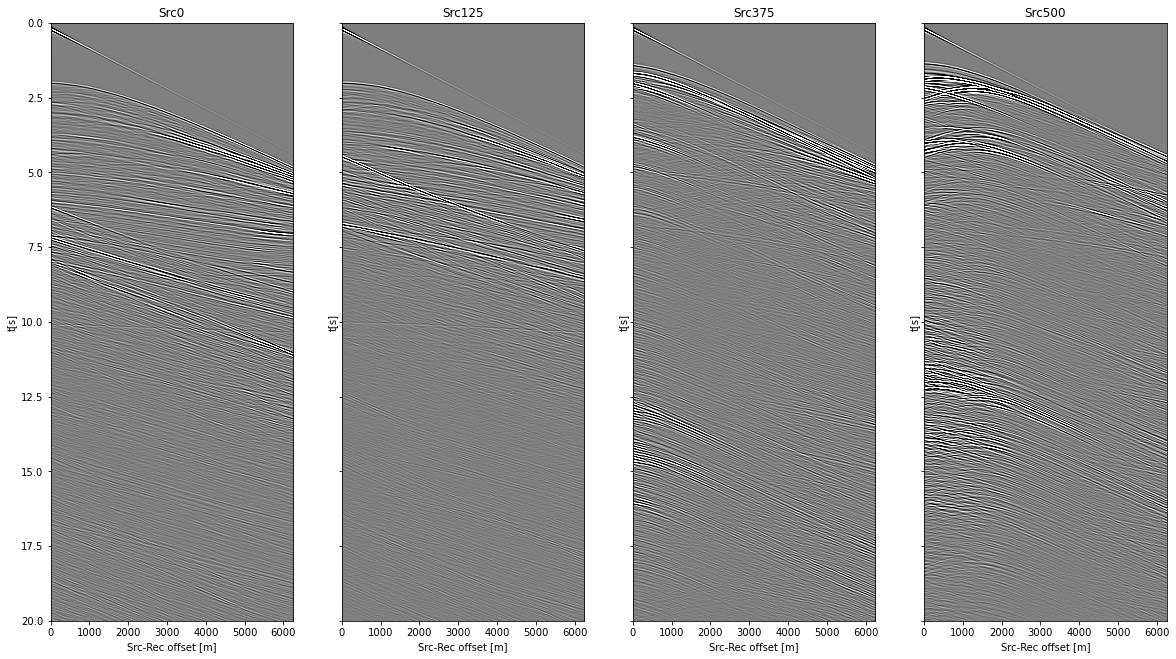

In [6]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 11))
for iax, isrc in enumerate([0, nsrc//4, 3*nsrc//4, nsrc-1]):
    axs[iax].imshow(dstreamer[isrc].T, extent=(0, nrec_streamer*12.5, taxistot[-1] * 1e-3, taxistot[0] * 1e-3), 
                   vmin=-1e-1, vmax=1e-1, cmap='gray')
    axs[iax].axis('tight')
    axs[iax].set_title(f'Src{isrc}')
    axs[iax].set_xlabel('Src-Rec offset [m]')
    axs[iax].set_ylabel('t[s]')
    axs[iax].set_ylim(20, 0);

Let's remove the direct wave

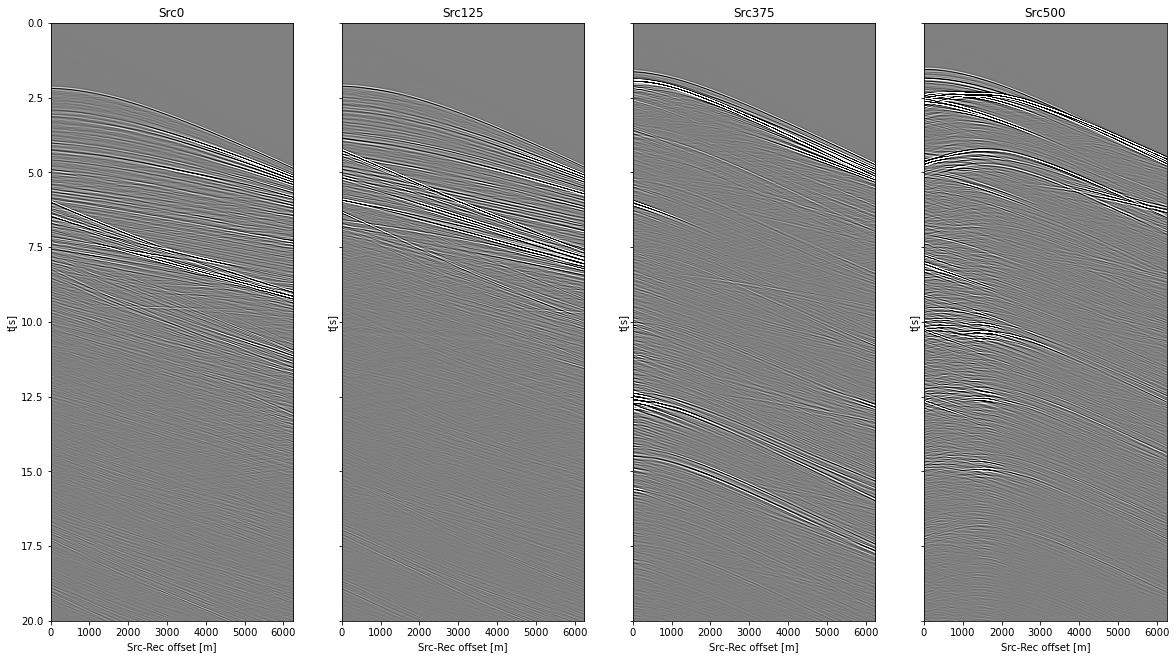

In [8]:
ffs = np.load('shots_fs_open/Streamerdir.npz')
ddirfs = ffs['d']
 
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20, 11))
for iax, isrc in enumerate([0, nsrc//4, 3*nsrc//4, nsrc-1]):
    axs[iax].imshow(dstreamer[isrc].T - ddirfs.T, 
                    extent=(0, nrec_streamer*12.5, taxistot[-1] * 1e-3, taxistot[0] * 1e-3), 
                    vmin=-1e-1, vmax=1e-1, cmap='gray')
    axs[iax].axis('tight')
    axs[iax].set_title(f'Src{isrc}')
    axs[iax].set_xlabel('Src-Rec offset [m]')
    axs[iax].set_ylabel('t[s]')
    axs[iax].set_ylim(20, 0);

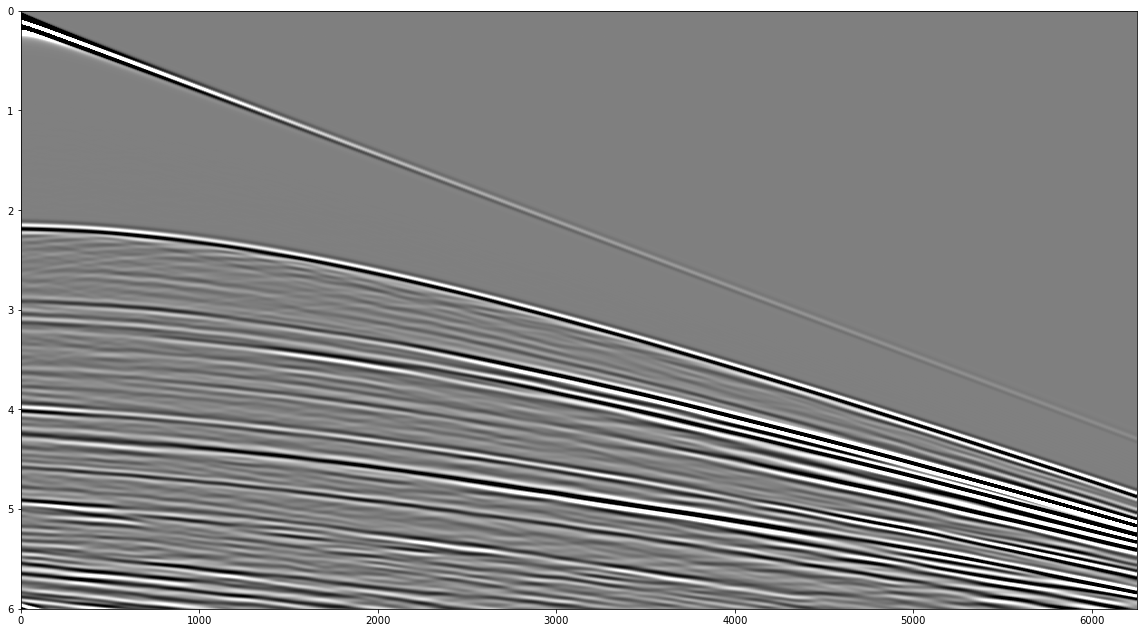

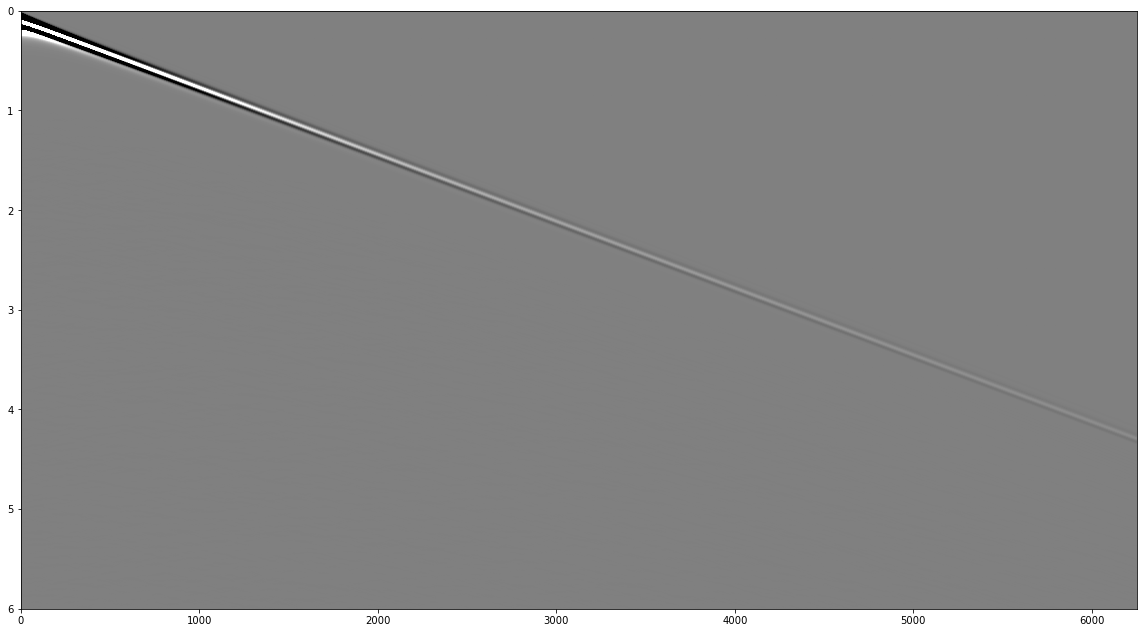

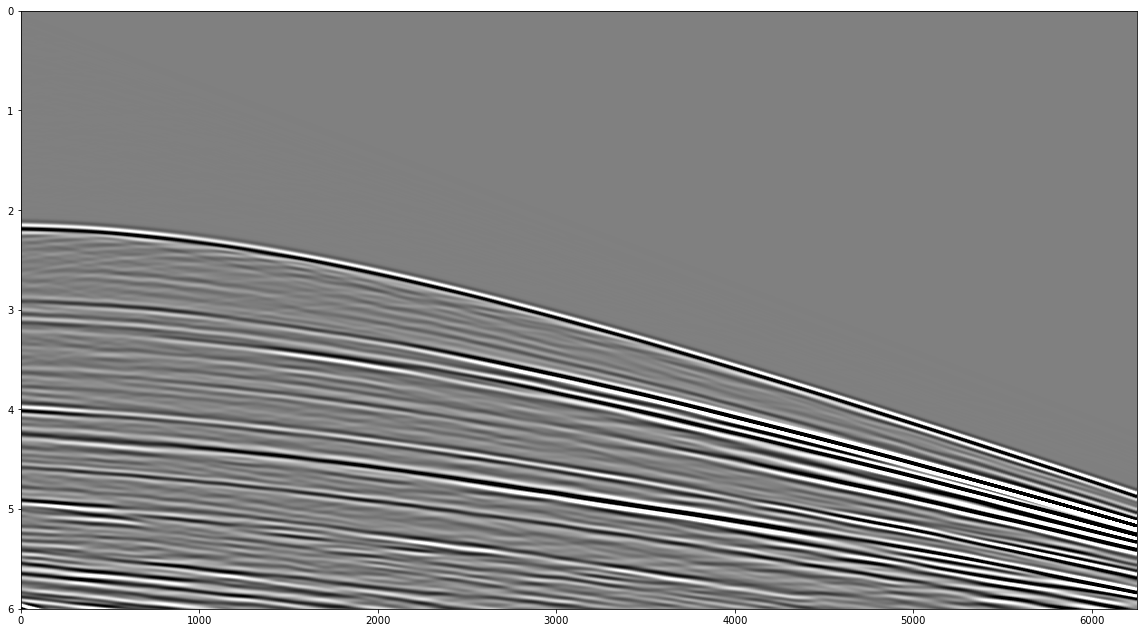

In [9]:
plt.figure(figsize=(20, 11))
plt.imshow(dstreamer[0].T,
           extent=(0, nrec_streamer*12.5, taxistot[-1] * 1e-3, taxistot[0] * 1e-3), 
           vmin=-1e-1, vmax=1e-1, cmap='gray')
plt.axis('tight')
plt.ylim(6, 0)

plt.figure(figsize=(20, 11))
plt.imshow(ddirfs.T,
           extent=(0, nrec_streamer*12.5, taxistot[-1] * 1e-3, taxistot[0] * 1e-3), 
           vmin=-1e-1, vmax=1e-1, cmap='gray')
plt.axis('tight')
plt.ylim(6, 0)

plt.figure(figsize=(20, 11))
plt.imshow(dstreamer[0].T - ddirfs.T,
           extent=(0, nrec_streamer*12.5, taxistot[-1] * 1e-3, taxistot[0] * 1e-3), 
           vmin=-1e-1, vmax=1e-1, cmap='gray')
plt.axis('tight')
plt.ylim(6, 0);